Data sample:
    Type of Travel  Online Boarding  In-flight Wifi Service  \
0               0              3.0                     3.0   
1               0              5.0                     2.0   
2               0              5.0                     4.0   
3               0              4.0                     2.0   
4               0              5.0                     3.0   

   Ease of Online Booking  Age  In-flight Entertainment  Flight Distance  \
0                     3.0   48                      5.0              821   
1                     2.0   35                      5.0              821   
2                     4.0   41                      3.0              853   
3                     2.0   50                      5.0             1905   
4                     3.0   49                      3.0             3470   

   Departure and Arrival Time Convenience  Seat Comfort  Class  Cleanliness  \
0                                     3.0           5.0      0          5.0  

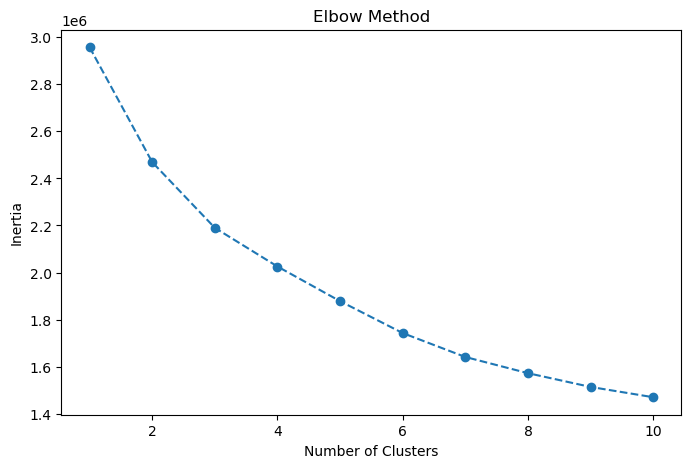

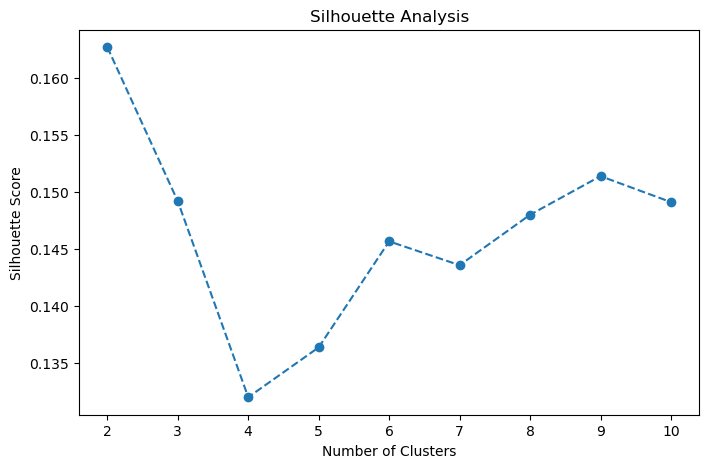

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from mpl_toolkits.mplot3d import Axes3D

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

# Ensure the data is numerical and drop NaN if any
data = data.select_dtypes(include=[np.number]).dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display the first few rows of the data
print("Data sample:\n", data.head())

# Function to calculate and plot the Elbow method
def plot_elbow_method(data, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o', linestyle='--')
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

# Function to calculate and plot Silhouette scores
def plot_silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    return silhouette_scores




# Run clustering and visualization
plot_elbow_method(scaled_data)
silhouette_scores = plot_silhouette_analysis(scaled_data)




Explained Variance Ratio: [0.23989488 0.18242353 0.11430148]


<Figure size 800x500 with 0 Axes>

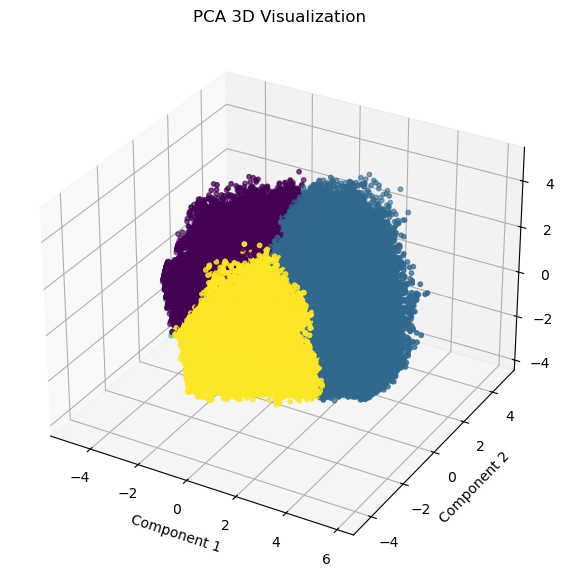

<Figure size 800x500 with 0 Axes>

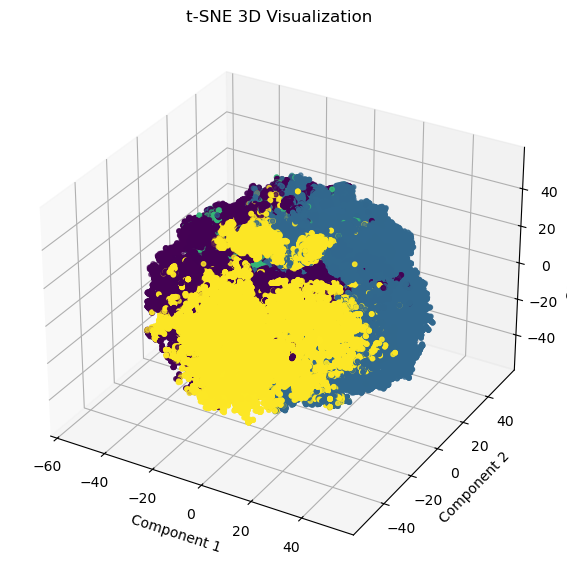

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Figure size 800x500 with 0 Axes>

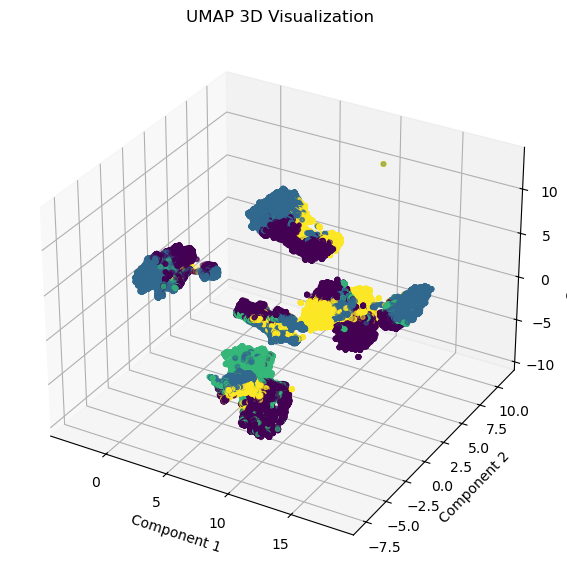

Explained Variance Ratio: [0.23989488 0.18242353 0.11430148]


<Figure size 800x500 with 0 Axes>

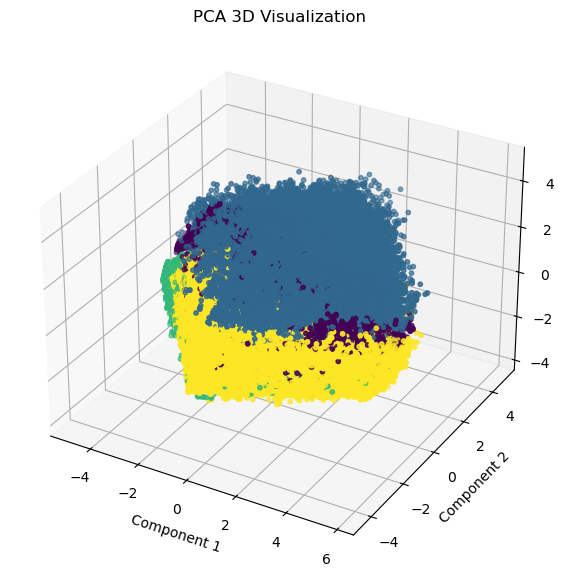

<Figure size 800x500 with 0 Axes>

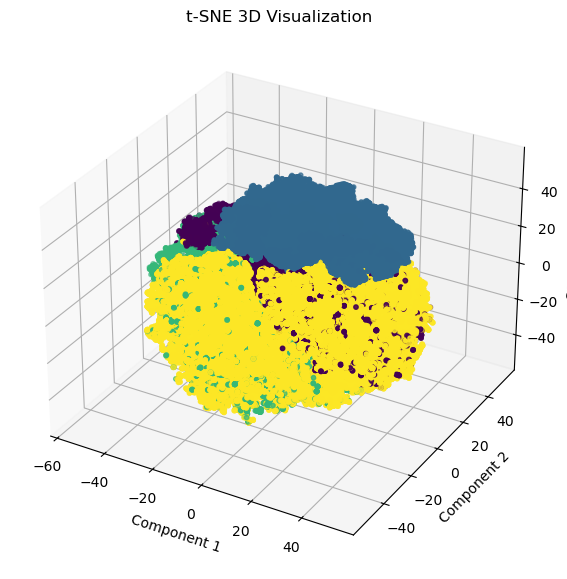

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Figure size 800x500 with 0 Axes>

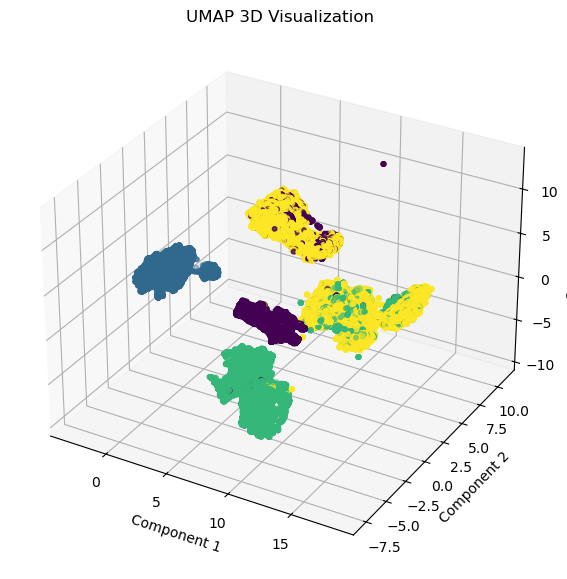

In [ ]:
# K-means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

# Gaussian Mixture Model (GMM)
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

# Hierarchical clustering
def hierarchical_clustering(data, n_clusters, method='ward'):
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels


# Dimensionality Reduction with PCA, t-SNE, and UMAP
def dimensionality_reduction(data, labels, method='PCA', n_components=3):
    if method == 'PCA':
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data)
        print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    elif method == 't-SNE':
        tsne = TSNE(n_components=n_components, random_state=42)
        reduced_data = tsne.fit_transform(data)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=n_components, random_state=42)
        reduced_data = reducer.fit_transform(data)
    else:
        raise ValueError("Invalid method. Choose 'PCA', 't-SNE', or 'UMAP'")
    
    # 2D Visualization
    plt.figure(figsize=(8, 5))
    if n_components == 2:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
        plt.title(f"{method} Visualization")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.colorbar()
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels, cmap='viridis', s=10)
        ax.set_title(f"{method} 3D Visualization")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.set_zlabel("Component 3")
        plt.show()
# Choose the optimal number of clusters (based on the analysis above)
optimal_clusters = 4

# K-means
kmeans_labels = kmeans_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, kmeans_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, kmeans_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, kmeans_labels, method='UMAP', n_components=3)

# GMM
gmm_labels = gmm_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, gmm_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, gmm_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, gmm_labels, method='UMAP', n_components=3)

# Hierarchical clustering
hier_labels = hierarchical_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, hier_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, hier_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, hier_labels, method='UMAP', n_components=3)

In [ ]:
# K-means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

# Gaussian Mixture Model (GMM)
def gmm_clustering(data, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

# Hierarchical clustering
def hierarchical_clustering(data, n_clusters, method='ward'):
    linkage_matrix = linkage(data, method=method)
    labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample index")
    plt.ylabel("Distance")
    plt.show()
    
    return labels


# Dimensionality Reduction with PCA, t-SNE, and UMAP
def dimensionality_reduction(data, labels, method='PCA', n_components=3):
    if method == 'PCA':
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data)
        print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    elif method == 't-SNE':
        tsne = TSNE(n_components=n_components, random_state=42)
        reduced_data = tsne.fit_transform(data)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=n_components, random_state=42)
        reduced_data = reducer.fit_transform(data)
    else:
        raise ValueError("Invalid method. Choose 'PCA', 't-SNE', or 'UMAP'")
    
    # 2D Visualization
    plt.figure(figsize=(8, 5))
    if n_components == 2:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
        plt.title(f"{method} Visualization")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.colorbar()
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels, cmap='viridis', s=10)
        ax.set_title(f"{method} 3D Visualization")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.set_zlabel("Component 3")
        plt.show()
# Choose the optimal number of clusters (based on the analysis above)
optimal_clusters = 7

# K-means
kmeans_labels = kmeans_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, kmeans_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, kmeans_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, kmeans_labels, method='UMAP', n_components=3)

# GMM
gmm_labels = gmm_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, gmm_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, gmm_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, gmm_labels, method='UMAP', n_components=3)

# Hierarchical clustering
hier_labels = hierarchical_clustering(scaled_data, optimal_clusters)
dimensionality_reduction(scaled_data, hier_labels, method='PCA', n_components=3)
dimensionality_reduction(scaled_data, hier_labels, method='t-SNE', n_components=3)
dimensionality_reduction(scaled_data, hier_labels, method='UMAP', n_components=3)